<a href="https://colab.research.google.com/github/031wnstjd/Deep-Learning/blob/master/DL_10_Data_augmentation_%26_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL_10 - Data augmentation & CNN

In [ ]:
name = input("Name :")
ID = input("student ID :")

Name :추준성
student ID :2016145028


## AlexNet - 실습

nn.Sequential을 사용하여 AlexNet을 구현하시오

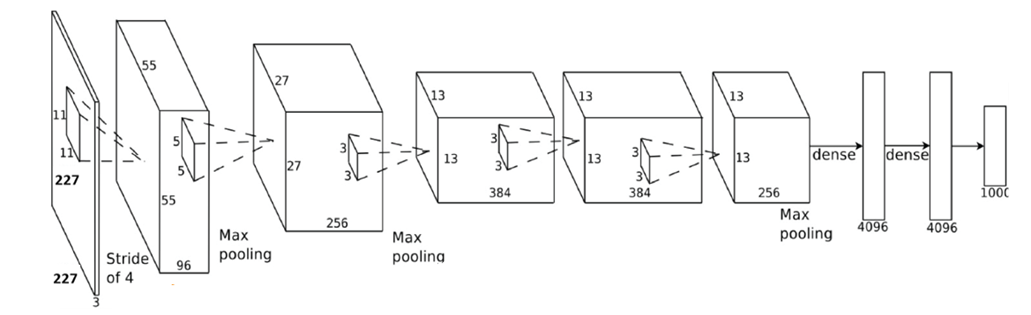

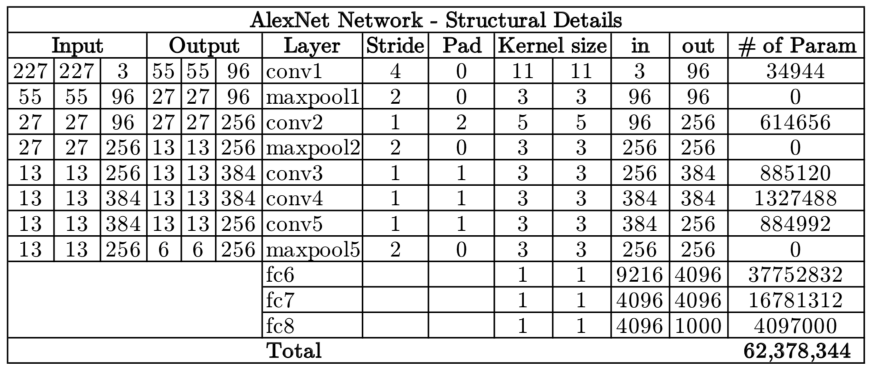

### Network

In [ ]:

class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, 11, 4),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(3, 2),

            nn.Conv2d(96, 256, 5, 1, 2),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(3, 2),

            nn.Conv2d(256, 384, 3, 1, 1),
            nn.ReLU(inplace=True), 

            nn.Conv2d(384, 384, 3, 1, 1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(3, 2)
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(9216, 4096),
            nn.ReLU(inplace=True),

            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, 1000)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

### 모델 확인

In [ ]:
from torchsummary import summary

model = AlexNet()
model.cuda()
## Model Summary
summary(model, input_size=(3, 227, 227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
          Dropout-14                 [-